##### Background
This dataset deals with pollution in the U.S. It contains daily data for the four major pollutants NO2, O3, SO2 and CO during 2000 and 2016. The file was not put together by myself, but I accessed it from https://www.kaggle.com/sogun3/uspollution.
The data set comes with 28 variables (among which each of the four pollutations represents five columns) and more than one million observations.

The original data was scraped from the database of U.S. EPA : https://aqsdr1.epa.gov/aqsweb/aqstmp/airdata/download_files.html

This notebook mainly deals with pollution in the state California, since it by far has the most data points. The focus of this work is on data cleaning and visualization.

Remarks and suggestions for improvement are very welcome.

In [1]:
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
raw_data = pd.read_csv('C:/Users/HP/Documents/Python Projects/US Pollution 2016/pollution_us_2000_2016.csv')

In [3]:
raw_data.head(5)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,02/01/2000,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


Show all column names

In [4]:
raw_data.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

Drop not needed columns

In [5]:
data = raw_data.drop(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address', 'County', 'NO2 Units', 
        'O3 Units', 'SO2 Units', 'CO Units'], axis = 1)

In [6]:
data.columns

Index(['State', 'City', 'Date Local', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Mean', 'O3 1st Max Value',
       'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean', 'SO2 1st Max Value',
       'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean', 'CO 1st Max Value',
       'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

Show data descriptive statistics for all variables

In [7]:
data.describe(include='all')

,State,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1048575,1048575,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,524489.000000,1.048575e+06,1.048575e+06,1.048575e+06,524352.000000
unique,37,120,4018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,California,Not in a city,10/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,397532,65402,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.447425e+01,2.810977e+01,1.186842e+01,2.655708e+01,2.574110e-02,3.967055e-02,1.016144e+01,3.607080e+01,2.488623e+00,5.964118e+00,9.491689e+00,9.674317,4.221252e-01,7.282010e-01,8.058085e+00,7.026795
std,NaN,NaN,NaN,1.003320e+01,1.670082e+01,7.861519e+00,1.580662e+01,1.165894e-02,1.615542e-02,3.911422e+00,2.087103e+01,3.220715e+00,8.982167e+00,6.745944e+00,13.752017,3.601106e-01,7.451072e-01,7.963635e+00,6.724737
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.545450e-01,-3.000000e-01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,NaN,NaN,NaN,7.086957e+00,1.600000e+01,6.000000e+00,1.500000e+01,1.720800e-02,2.900000e-02,9.000000e+00,2.500000e+01,4.571430e-01,1.000000e+00,4.000000e+00,1.000000,2.000000e-01,3.000000e-01,0.000000e+00,3.000000
50%,NaN,NaN,NaN,1.250000e+01,2.700000e+01,1.000000e+01,2.500000e+01,2.545800e-02,3.900000e-02,1.000000e+01,3.300000e+01,1.425000e+00,3.000000e+00,8.000000e+00,4.000000,3.391300e-01,5.000000e-01,6.000000e+00,6.000000
75%,NaN,NaN,NaN,1.975000e+01,3.800000e+01,2.000000e+01,3.600000e+01,3.366700e-02,4.900000e-02,1.100000e+01,4.200000e+01,3.291667e+00,7.000000e+00,1.400000e+01,11.000000,5.416670e-01,9.000000e-01,1.400000e+01,9.000000


#### Check for missing values (NAs)

In [8]:
data.isnull().sum()

State                     0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              524086
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               524223
dtype: int64

#### Drop missing values

SO2 Air Quality and CO Air Quality variables have missing values for about half of the data set's 1 million observations.
For simplicity and to speed up the computing time in Jupyer Lab, I simply drop all observations with NAs.

In [9]:
data_no_mv =  data.dropna(axis=0)

In [10]:
# Double-check that no NA's exist anymore
data_no_mv.isna().sum()

State                0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

##### Remove duplicates

In [11]:
data_no_mv.duplicated().sum()

611

In [12]:
data_no_dupl = data_no_mv.drop_duplicates()

In [13]:
data_no_dupl.describe(include='all')

,State,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,261662,261662,261662,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000,261662.000000
unique,37,120,4018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,California,Not in a city,07/05/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,99363,16351,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,14.473810,28.104104,11.865101,26.550905,0.025736,0.039665,10.158101,36.056562,2.501974,6.962152,8.452951,9.677710,0.423971,0.617201,6.760687,7.021432
std,NaN,NaN,NaN,10.037609,16.699588,7.861642,15.803095,0.011654,0.016143,3.909266,20.826475,3.225265,10.460867,6.765220,13.756552,0.362599,0.588634,7.987228,6.713026
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,7.086957,16.000000,6.000000,15.000000,0.017208,0.029000,9.000000,25.000000,0.476190,1.000000,2.000000,1.000000,0.200000,0.300000,0.000000,3.000000
50%,NaN,NaN,NaN,12.500000,27.000000,10.000000,25.000000,0.025458,0.039000,10.000000,33.000000,1.434783,3.500000,8.000000,4.000000,0.341667,0.500000,4.000000,6.000000
75%,NaN,NaN,NaN,19.750000,38.000000,20.000000,36.000000,0.033625,0.049000,11.000000,42.000000,3.295739,8.000000,13.000000,11.000000,0.545833,0.800000,10.000000,9.000000


##### Check for outliers

View the values of each  NO2 AQI, O3 AQI,SO2 AQI and CO AQI to spot potential outliers

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


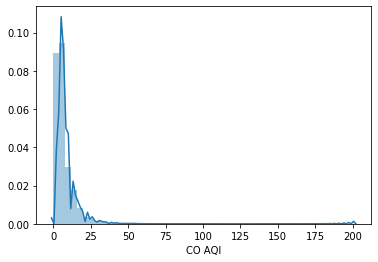

In [14]:
import seaborn as sb
sb.distplot(data_no_dupl['CO AQI'])

From the distplot we can see that the big majority of observed values lie in the range of 0-25 CO parts per million.
To prevent outlying observations influencing the analysis, I apply the common approach of excluding the observations that lie outside the 99th percentile.

In [15]:
q = data_no_dupl['CO AQI'].quantile(0.99)
q

33.0

# Decide here if values greater 33 are really "outliers" and thus should be dropped or keep them.

In [16]:
# Dropping observations that are greater than the 99th percentile of 33.
data_no_dupl[data_no_dupl['CO AQI'] > q]

,State,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
13,Arizona,Phoenix,04/01/2000,40.260870,74.0,8,72,0.014167,0.033,9,28,7.083333,16.0,8,23.0,1.829167,3.0,23,34.0
17,Arizona,Phoenix,05/01/2000,48.450000,61.0,22,58,0.006667,0.012,9,10,8.708333,15.0,7,21.0,2.700000,3.7,2,42.0
21,Arizona,Phoenix,06/01/2000,39.950000,73.0,8,71,0.011750,0.025,10,21,6.761905,17.0,7,24.0,2.308333,3.6,9,41.0
25,Arizona,Phoenix,07/01/2000,29.625000,43.0,9,41,0.011625,0.024,10,20,8.666667,21.0,7,30.0,1.829167,3.5,23,40.0
29,Arizona,Phoenix,08/01/2000,29.666667,41.0,0,39,0.009750,0.020,10,17,8.250000,18.0,0,26.0,2.787500,5.1,2,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989004,California,Calexico,14/12/2010,34.217391,64.0,9,62,0.005458,0.014,8,12,1.913043,6.0,14,9.0,2.325000,3.9,9,44.0
989052,California,Calexico,26/12/2010,14.086957,28.0,19,26,0.018417,0.033,6,28,0.043478,1.0,0,1.0,1.395833,3.4,2,39.0
1016810,District Of Columbia,Washington,14/01/2010,49.727273,86.0,8,85,0.006542,0.008,8,7,4.916667,12.0,12,17.0,2.275000,3.1,8,35.0
1018018,District Of Columbia,Washington,13/11/2010,40.000000,68.0,9,66,0.010333,0.025,9,21,3.708333,6.0,10,9.0,2.575000,3.5,6,40.0


No outlying values detected.

##### Check and clean indiv. variables

1. State

In [17]:
data_no_dupl['State'].unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Country Of Mexico', 'Arkansas', 'Oregon', 'Wyoming',
       'North Dakota', 'Idaho', 'Ohio', 'Georgia'], dtype=object)

In [18]:
# Remove all rows that contain string 'Country Of Mexico' in column 'State'
data_var1 = data_no_dupl[~data_no_dupl.State.str.contains("Country Of Mexico")]

2. City

In [19]:
data_var1['City'].unique()

array(['Phoenix', 'Scottsdale', 'Tucson', 'Concord', 'Bethel Island',
       'San Pablo', 'Pittsburg', 'Calexico', 'Bakersfield', 'Burbank',
       'Los Angeles', 'Long Beach', 'Hawthorne', 'Costa Mesa', 'Rubidoux',
       'Not in a city', 'Arden-Arcade', 'Victorville', 'Chula Vista',
       'San Diego', 'San Francisco', 'Capitan', 'Lompoc', 'Goleta',
       'Vandenberg Air Force Base', 'Davenport', 'Vallejo', 'Welby',
       'Washington', 'Winter Park', 'Chicago', 'Cicero',
       'Calumet City (PU RR name Calumet Park (sta.))',
       'Indianapolis (Remainder)', 'Kansas City', 'Ashland',
       'Lexington-Fayette (corporate name for Lexington)', 'Henderson',
       'Louisville', 'Paducah', 'Baton Rouge', 'Detroit', 'Sunset Hills',
       'Ladue', 'Ferguson', 'St. Ann', 'St. Louis', 'Camden', 'New York',
       'Holtsville', 'Winston-Salem', 'Charlotte', 'Park Hill',
       'Ponca City', 'Pittsburgh', 'Beaver Falls', 'Reading', 'Altoona',
       'Bristol', 'Johnstown', 'Scranton', 'La

In [20]:
# Check all rows with string ''Not in a city''  in column 'City'
len(data_var1[data_var1.City.str.contains('Not in a city')])

16351

In [21]:
# Replace 'Not in a city' entries in 'City' column with the respective State name
city =data_var1['City'] 
for city in range(len(data_var1['City'])):
    if city == 'Not in a city':
        data_var1['City'].replace ('Not in a city',data_var1['State'])
print (len(data_var1[data_var1.City.str.contains('Not in a city')]))

16351


In [27]:
for x in range(len(data_var1['City'])):
    if data_var1['City'].any == 'Not in a city':
        data_var1['City'].replace ('Not in a city','State')


for city in range(len(data_var1['City'])):                       
    if data_var1.loc[data_var1['City'].all == 'Not in a city', 'City'] = 99:
        print(data_var1['City'].unique)

In [28]:
len(data_var1['City'] == 'Not in a city')

259850

In [29]:
data_var1['City'] == 'Not in a city'

1          False
5          False
9          False
13         False
17         False
           ...  
1048555    False
1048559    False
1048563    False
1048567    False
1048571    False
Name: City, Length: 259850, dtype: bool

3. Date local

##### Convert Date Local to date format

In [ ]:
# make copy of data first to avoid ~SettingWithCopyWarning~
data_var1 = data_var1[data_var1['Date Local'].notnull()].copy()
data_var1['Date Local'] = pd.to_datetime(data_var1['Date Local']) 

##### Extract years and months

In [ ]:
data_var1['Year'] = data_var1.loc[:,'Date Local'].dt.year # year
data_var1['Month'] = data_var1.loc[:,'Date Local'].dt.month # year
data_var1.head()

# Analysis 1:  Air Quality (AQI) development over time in California

Take the AQI index of all four air pollution categories

In [ ]:
# create sub data set with relevant variables only
pollution_df = data_var1[['Date Local','Year','Month','State','City','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]

##### Select California entries only  (obseverations for other states are relatively few)

In [ ]:
pollution_CA = pollution_df [pollution_df['State'] == 'California']
# reset column index
pollution_CA.reset_index(drop=True)
pollution_CA.head()

For better handling and to prevent data size exceeding plotly data limit, select only 10% of the California data.

In [ ]:
CA_10per  = pollution_CA.sample(frac=0.1)
print(CA_10per)

Group subset by Year and Month and show mean values for each AQI category

In [ ]:
pollution_grouped = pollution_CA.groupby(['Year', 'Month']).mean()
pollution_grouped

##### Subplots for each AQI category over time

For better handling and to prevent data size exceeding plotly data limit, select only 10% of the California data.

In [ ]:
CA_10per  = pollution_CA.sample(frac=0.1).reset_index(drop=True)

In [ ]:
fig, (ax1, ax2,ax3,ax4) = pp.subplots(4,1, figsize = (15,15), sharex= True) # 4 rows, 1 column

ax1.bar(CA_10per['Date Local'],CA_10per['CO AQI'], color = 'purple')
ax1.set(xlabel="Date",ylabel="CO")
ax1.set_title('CO AQI')

ax2.bar( CA_10per['Date Local'], CA_10per['SO2 AQI'], color = 'red')
ax2.set(xlabel="Date",ylabel="SO2")
ax2.set_title('SO2 AQI')

ax3.bar(CA_10per['Date Local'],CA_10per['NO2 AQI'], color = 'green')
ax3.set(xlabel="Date",ylabel="NO2")
ax3.set_title('NO2 AQI')

ax4.bar(CA_10per['Date Local'],CA_10per['O3 AQI'], color = 'blue')
ax4.set(xlabel="Date",ylabel="O3")
ax4.set_title('O3 AQI')
pp.show()

While we observe reoccuring seasonal patterns for all of the four air quality index categories,
for CO,SO2 and NO2 we see that less extremely high values were recorded and the overall measured values tend to have declined over the last years.

In [ ]:
# Create two new pd data frames
AQI_time  = CA_10per[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']] # all AQI incl. date
AQI = AQI_time.iloc[:,1:]  # all AQI only

##### Plotting with Plotly

In [ ]:
import plotly.express as px 
import cufflinks as cf            # used to bind Plotly to pandas objects within Jupyter notebookimport chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.graph_objs as go

In [ ]:
tls.set_credentials_file(username='janRo', api_key='0uK7UFbgo7z8fpMpUvk8')

Distribution of AQI values per AQI category in CA

In [ ]:
AQI.iplot(kind='histogram', subplots= True, shape = (1,4),
         xaxis_title="Count", yaxis_title = 'Value', 
         color=["red", "goldenrod", "#00D", 'lightgreen'],
         title= {'text': "Distribution of AQI values per AQI category in CA"},
         filename='US Pollution-CA-AQI-distrib-multiple-histo')

Measured NO2 values are far more spread out then those of other AQI categories.

In [ ]:
# All four AQI categories over time
fig = go.Figure()
fig.add_trace(go.Scatter(x=AQI_time['Date Local'], y=AQI_time['NO2 AQI'],
                    mode='markers', name='NO2 AQI', opacity=0.7))
fig.add_trace(go.Scatter(x=AQI_time['Date Local'], y=AQI_time['O3 AQI'],
                    mode='markers', name='O3 AQI', opacity=0.7))
fig.add_trace(go.Scatter(x=AQI_time['Date Local'], y=AQI_time['SO2 AQI'],
                    mode='markers', name='SO2 AQI', opacity=0.9))
fig.add_trace(go.Scatter(x=AQI_time['Date Local'], y=AQI_time['CO AQI'],
                    mode='markers', name='CO AQI', opacity=0.9))
fig.show()

In [ ]:
# Animated scatter for Californian cities' CO vs. SO2 development over time
fig = px.scatter(CA_10per,x='SO2 AQI', y='CO AQI', 
             animation_frame='Year', animation_group='City',color='City',
             range_y=[0, 50], range_x=[0, 50])
fig.show()

#### Scatter pair plots to see correlations between the four AQI categories

In [ ]:
sb.pairplot(AQI_time)